In [ ]:
from tqdm import tqdm
import os
import numpy as np
import time

In [ ]:
# %%capture
# This cell will take time
!pip install unsloth
# Also get the latest nightly Unsloth!
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.2/174.2 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.4/293.4 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.1/112.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

Found existing installation: unsloth 2024.12.4
Uninstalling unsloth-2024.12.4:
  Successfully uninstalled unsloth-2024.12.4
  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-install-sz91dnb6/unsloth_63954fe52aba4efcb276f9d58fbd5fa6
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-install-sz91dnb6/unsloth_63954fe52aba4efcb276f9d58fbd5fa6
  Resolved https://github.com/unslothai/unsloth.git to commit 85f1fa096afde5efe2fb8521d8ceec8d13a00715
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for unsloth: filename=unsloth-2024.12.4-py3-none-any.whl size=173746 sha256=36dae69319c5fc9205d00fe89f4508da59f15d2aabdeedccc4dd448e63f1f14d
  Stored in directory: /tmp/pip-ephem-wheel-cache-m2tfpp40/wheels/ed/d4/e9/76fb290ee3df0a5fc21ce5c2c788e29e9607a2353d8342fd0d
Successfully built unsloth


In [ ]:
!pip install kaggle

# Upload your kaggle.json file (API key)
from google.colab import files
#files.upload()

# Create the .kaggle directory and move the API key
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d surajkarakulath/labelled-corpus-political-bias-hugging-face

# Unzip the dataset (if it's a zip file)
!unzip labelled-corpus-political-bias-hugging-face.zip


Streaming output truncated to the last 5000 lines.
  inflating: Right Data/Right Data/1290_0.txt  
  inflating: Right Data/Right Data/1291_0 (2).txt  
  inflating: Right Data/Right Data/1291_0.txt  
  inflating: Right Data/Right Data/1292_0.txt  
  inflating: Right Data/Right Data/1293_0.txt  
  inflating: Right Data/Right Data/1294_0.txt  
  inflating: Right Data/Right Data/1295_0.txt  
  inflating: Right Data/Right Data/1296_0 (2).txt  
  inflating: Right Data/Right Data/1296_0.txt  
  inflating: Right Data/Right Data/1297_0.txt  
  inflating: Right Data/Right Data/1298_0 (2).txt  
  inflating: Right Data/Right Data/1298_0.txt  
  inflating: Right Data/Right Data/1299_0 (2).txt  
  inflating: Right Data/Right Data/1299_0.txt  
  inflating: Right Data/Right Data/129_0 (2).txt  
  inflating: Right Data/Right Data/129_0.txt  
  inflating: Right Data/Right Data/12_0 (2).txt  
  inflating: Right Data/Right Data/12_0.txt  
  inflating: Right Data/Right Data/1300_0 (2).txt  
  inflating: Ri

In [ ]:
!mkdir -p dataset

In [ ]:
import os
import shutil
from datasets import load_dataset
from datasets import Dataset

In [ ]:
left_data = os.listdir('Left Data/Left Data')
right_data = os.listdir('Right Data/Right Data')
center_data = os.listdir('Center Data/Center Data')

In [ ]:
for i in range(3996): # Downsampling based on smallest dataset (we have enough data to train regardless, so this should be fine)
  shutil.copy(f'Left Data/Left Data/{left_data[i]}', f'dataset/left{left_data[i]}')
  shutil.copy(f'Right Data/Right Data/{right_data[i]}', f'dataset/right{right_data[i]}')
  shutil.copy(f'Center Data/Center Data/{center_data[i]}', f'dataset/center{center_data[i]}')

In [ ]:
texts = []
data_dir='dataset'
for file_name in os.listdir(data_dir):
    if file_name.endswith(".txt"):
        with open(os.path.join(data_dir, file_name), "r", encoding="utf-8") as file:
            if "left" in file_name:
                label = "left"
            elif "right" in file_name:
                label = "right"
            else:
                label = "center"
            texts.append({"file_name": file_name, "content": file.read(), "label": label})



In [ ]:
dataset = Dataset.from_list(texts).train_test_split(test_size=0.1, seed = 42)
dataset

DatasetDict({
    train: Dataset({
        features: ['file_name', 'content', 'label'],
        num_rows: 10789
    })
    test: Dataset({
        features: ['file_name', 'content', 'label'],
        num_rows: 1199
    })
})

In [ ]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 8192
dtype = None 
load_in_4bit = True

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [ ]:
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Meta-Llama-3.1-8B", # We replaced model name for the other models (unsloth/Phi-3.5-mini-instruct, unsloth/gemma-2-2b-it-bnb-4bit)
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)

==((====))==  Unsloth 2024.12.4: Fast Llama patching. Transformers:4.46.3.
   \\   /|    GPU: NVIDIA A100-SXM4-40GB. Max memory: 39.564 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu121. CUDA: 8.0. CUDA Toolkit: 12.1. Triton: 3.1.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.28.post3. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/230 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

In [ ]:
# These hyperparameters were left the same for all models
model = FastLanguageModel.get_peft_model(
    model,
    r = 32, 
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 64,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    # [NEW] "unsloth" uses 30% less VRAM, fits 2x larger batch sizes!
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = True,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)

Unsloth 2024.12.4 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


In [ ]:
dataset['train']

Dataset({
    features: ['file_name', 'content', 'label'],
    num_rows: 10789
})

In [ ]:
prompt = """Classify the bias present in these news articles. Output 'left' if the article is biased towards the left, 'right' if the article is biased towards the right, and 'center' if it is neutral. The article and expected outcome are given below:

### Article:
{}


### Output:
{}"""

EOS_TOKEN = tokenizer.eos_token # Must add EOS_TOKEN
def formatting_prompts_func(examples):
    articles = examples["content"]
    labels = examples["label"]
    texts = []
    for article, label in zip(articles, labels):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        text = prompt.format(article, label) + EOS_TOKEN
        texts.append(text)
    return { "text" : texts, }

In [ ]:
# Process the training dataset and generate prompt for each datapoint
train_dataset = dataset['train'].map(formatting_prompts_func, batched = True,)

Map:   0%|          | 0/10789 [00:00<?, ? examples/s]

In [ ]:
tokens_count = []
for t in tqdm(train_dataset['text']):
  tokens_count.append(len(tokenizer(t)['input_ids']))

100%|██████████| 10789/10789 [00:44<00:00, 240.60it/s]


In [ ]:
indices_to_drop = np.where(np.array(tokens_count) > max_seq_length)[0]

In [ ]:
# Drop the indices from train_dataset (it's better to do this than truncate them during training, we only lose around 35 out of 10k samples)
train_dataset = train_dataset.select([i for i in range(len(train_dataset)) if i not in indices_to_drop])

In [ ]:
#print a training example
train_dataset[0]

{'file_name': 'center2979_0.txt',
 'content': "Education Secretary Betsy DeVosBetsy DeVosEducation Department revamps College Scorecard Why a few dozen zip codes dominate political giving Jury finds Theranos founder Elizabeth Holmes guilty on four counts MORE ignited a backlash after announcing plans to revamp Obama-era guidance for colleges and universities on how to handle sexual assaults on campuses to better protect students who are accused.DeVos, speaking at George Mason University’s Arlington, Va., campus, said the Obama administration helped elevate the issue of sexual assault in American public life and issued guidance in 2011 with good intentions, but good intentions alone are not enough.“Justice demands humility, wisdom and prudence,” she said. “It requires a serious pursuit of truth.”Civil rights advocates were quick to chastise DeVos for the policy change.“This is another cruel, heartless move from the Discrimination Administration,” said Mara Keisling, executive director o

In [ ]:
train_dataset = train_dataset.shuffle(seed=42)

In [ ]:
num_validation_samples = 64

# Split the train_dataset into training and validation
train_dataset_split = train_dataset.select(range(len(train_dataset) - num_validation_samples))  # First part for training
val_dataset = train_dataset.select(range(len(train_dataset) - num_validation_samples, len(train_dataset))) # This part is for validation

Note: Practically all hyperparameters were left the same for every model to ensure comparison is fair.

In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

training_args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 8,
        warmup_steps = 5,
        # num_train_epochs = 1, # Set this for 1 full training run.
        max_steps = 600,
        learning_rate = 2e-4,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        fp16_full_eval = True,
        per_device_eval_batch_size = 2,
        eval_accumulation_steps = 8,
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "wandb", # Use this for WandB etc
        run_name = f"dl_final_project_1",
        save_steps = 50,  # Save model every 50 steps
        save_strategy = "steps",  # Save based on steps
        save_total_limit = 2,
        eval_steps=25,  # Run validation every 25 steps
        eval_strategy="steps",  # Ensure evaluation is done based on steps
        load_best_model_at_end=True,
        metric_for_best_model = "eval_loss",
        greater_is_better = False,
        push_to_hub=True,
        hub_model_id="rr4433/dl_final_project_r32",
        hub_strategy="all_checkpoints"
    )

In [ ]:
trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = train_dataset_split,
    eval_dataset = val_dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 4,
    packing = False, # Can make training 5x faster for short sequences.
    args = training_args
)

Map (num_proc=4):   0%|          | 0/10689 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/64 [00:00<?, ? examples/s]

max_steps is given, it will override any value given in num_train_epochs


Note: Ignore weird error in cell output. The checkpoint was created and uploaded to both wandb and HF Hub correctly.

In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 10,689 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 2 | Gradient Accumulation steps = 8
\        /    Total batch size = 16 | Total steps = 600
 "-____-"     Number of trainable parameters = 83,886,080


wandb: Currently logged in as: rr4433 (rr4433-new-york-university). Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss
25,1.882200,1.763848
50,1.770200,1.758558
75,1.923300,1.761176
100,1.707400,1.762230
125,1.853800,1.762688
150,1.905100,1.760790
175,1.762500,1.757907
200,1.842000,1.751793
225,1.852700,1.751887
250,1.817200,1.751274


wandb: Adding directory to artifact (./outputs/checkpoint-50)... Done. 1.4s
wandb: Adding directory to artifact (./outputs/checkpoint-100)... Done. 1.1s
wandb: Adding directory to artifact (./outputs/checkpoint-150)... Done. 1.0s
wandb: Adding directory to artifact (./outputs/checkpoint-200)... Done. 0.9s
wandb: Adding directory to artifact (./outputs/checkpoint-250)... Done. 3.3s
wandb: Adding directory to artifact (./outputs/checkpoint-300)... Done. 0.9s
wandb: Adding directory to artifact (./outputs/checkpoint-350)... Done. 1.1s
wandb: Adding directory to artifact (./outputs/checkpoint-400)... Done. 1.0s
wandb: Adding directory to artifact (./outputs/checkpoint-450)... Done. 0.9s
wandb: Adding directory to artifact (./outputs/checkpoint-500)... Done. 1.0s
wandb: Adding directory to artifact (./outputs/checkpoint-550)... Done. 1.4s
wandb: Adding directory to artifact (./outputs/checkpoint-600)... Done. 0.9s


ValueError: You have set `args.eval_strategy` to steps but you didn't pass an `eval_dataset` to `Trainer`. Either set `args.eval_strategy` to `no` or pass an `eval_dataset`. 

In [ ]:
model.save_pretrained("model_1_95")  # Save model to disk

In [ ]:
!zip model_1_95.zip -r model_1_95

  adding: model_1_95/ (stored 0%)
  adding: model_1_95/README.md (deflated 66%)
  adding: model_1_95/adapter_model.safetensors (deflated 7%)
  adding: model_1_95/adapter_config.json (deflated 53%)


In [ ]:
import json
with open('/content/outputs/checkpoint-600/trainer_state.json', 'r') as f:
    trainer_state = json.load(f)

In [ ]:
train_loss = list(map(lambda x: x['loss'],filter(lambda x: 'loss' in x,trainer_state['log_history'])))
eval_step = 25
# We take the mean of train_loss across 25 steps
train_loss_averaged = [sum(train_loss[i:i + eval_step]) / eval_step for i in range(0, len(train_loss), eval_step)]

In [ ]:
val_loss = list(map(lambda x: x['eval_loss'],filter(lambda x: 'eval_loss' in x,trainer_state['log_history'])))
val_steps = list(map(lambda x: x['step'],filter(lambda x: 'eval_loss' in x ,trainer_state['log_history'])))

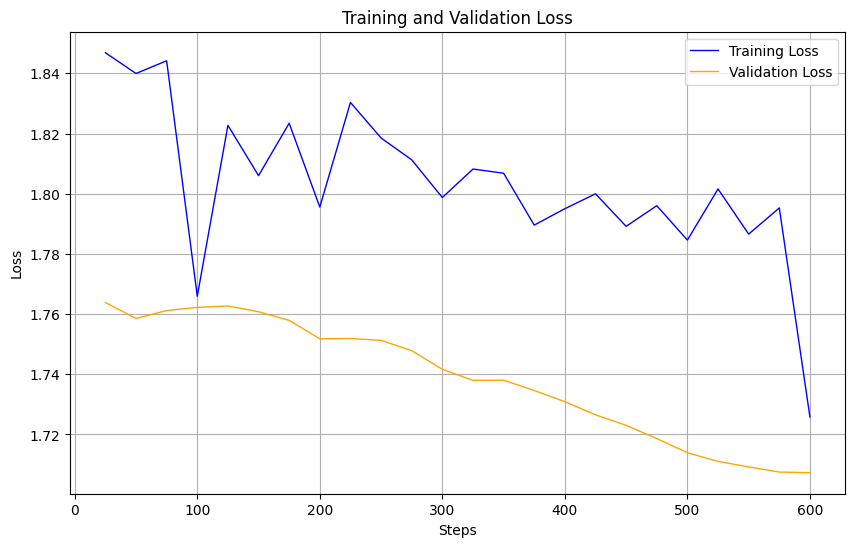

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(val_steps, train_loss_averaged, label='Training Loss', color='blue', linewidth=1)
plt.plot(val_steps, val_loss, label='Validation Loss', color='orange', linewidth=1)

plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


## Inference

In [ ]:
# Sample inferene data point
test_dataset = dataset['test']

In [ ]:
# Inference
FastLanguageModel.for_inference(model)
answers = []
true_answer = []
for i in tqdm(range(len(test_dataset))):
    sample_article = test_dataset['content'][i]
    sample_label = test_dataset['label'][i]
    input_prompt = prompt.format(
        sample_article,
        "", # output - leave this blank for generation! LLM willl generate is it is True or False
    )
    inputs = tokenizer(
    [
        input_prompt
    ], return_tensors = "pt").to("cuda")
    input_shape = inputs['input_ids'].shape
    input_token_len = input_shape[1] # 1 because of batch
    outputs = model.generate(**inputs, max_new_tokens = 64, use_cache = True)
    response = tokenizer.batch_decode([outputs[0][input_token_len:]], skip_special_tokens=True)
    answers.append((i, response[0]))
    true_answer.append((i, sample_label))
#

100%|██████████| 1199/1199 [05:15<00:00,  3.80it/s]


In [ ]:
correct=0
for i in range(len(answers)):
  if answers[i][1]==true_answer[i][1]:
    correct+=1

accuracy=correct/len(answers)
print(accuracy)

0.950792326939116
